<a href="https://colab.research.google.com/github/Gabriel-Mourad/Practica_2_INAM/blob/main/Copia_de_Students_INAM_02_classification_part_three_2022.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Ambient intelligence

In this lab session we are going to learn about:

1. Linear models for classification: Least squares and Fisher Discriminant.
2. The perceptron.
3. Multilayer perceptron and the Backpropagation algorithm.

If interested on the subject, a good summary for classification methods can be found [here](https://www.microsoft.com/en-us/research/wp-content/uploads/1996/01/neural_networks_pattern_recognition.pdf)

## Chapter exercise
![Linear](https://upload.wikimedia.org/wikipedia/commons/thumb/f/fe/Kernel_Machine.svg/1200px-Kernel_Machine.svg.png)




Use the sklearn library in order to train a [least squares](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.RidgeClassifier.html#sklearn.linear_model.RidgeClassifier) (ridge version, is just a linear square model with a regularization term), [LDA](https://scikit-learn.org/stable/modules/generated/sklearn.discriminant_analysis.LinearDiscriminantAnalysis.html), [perceptron](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Perceptron.html) and a [Neural Network](https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html#sklearn.neural_network.MLPClassifier) model to the [iris dataset](https://scikit-learn.org/stable/auto_examples/datasets/plot_iris_dataset.html) as a classification problem with 3 clases: Setosa, Versicolour and Virginica.

In each block there are detailed instructions about the steps to perform.

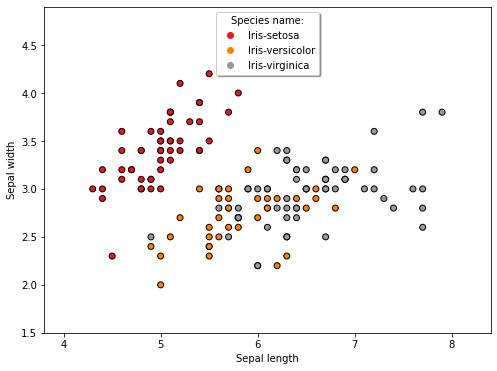

In [3]:
from sklearn.datasets import load_iris
from sklearn.model_selection import GridSearchCV
from matplotlib import pyplot as plt
import numpy as np
iris_data = load_iris()
seed = 20200315
X = iris_data.data
y = iris_data.target

x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5

plt.figure(2, figsize=(8, 6))
plt.clf()

# Plot the training points
plot = plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Set1,
            edgecolor='k')
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')

plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks()
plt.yticks()

plt.legend(handles=plot.legend_elements()[0], 
           labels=list(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']), 
           loc="upper center", shadow=True, 
           title="Species name:")


# Continue from here, good luck :)

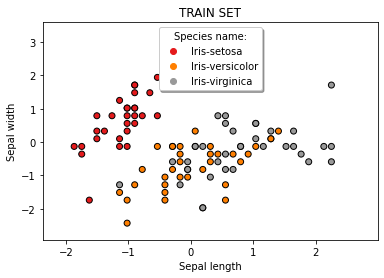

In [ ]:
# Plot the training points
plot = plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=plt.cm.Set1,
            edgecolor='k')
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.title('TRAIN SET')

plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks()
plt.yticks()

plt.legend(handles=plot.legend_elements()[0], 
           labels=list(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']), 
           loc="upper center", shadow=True, 
           title="Species name:")

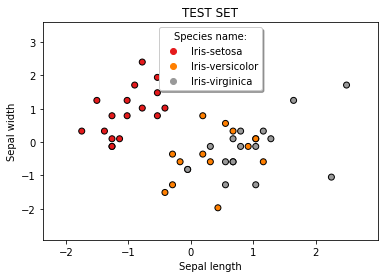

In [ ]:
# Plot the training points
plot = plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=plt.cm.Set1,
            edgecolor='k')
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.title('TEST SET')

plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks()
plt.yticks()

plt.legend(handles=plot.legend_elements()[0], 
           labels=list(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']), 
           loc="upper center", shadow=True, 
           title="Species name:")

In [4]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_iris
from sklearn.model_selection import GridSearchCV
from matplotlib import pyplot as plt

from sklearn.linear_model import RidgeClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import Perceptron
from sklearn.neural_network import MLPClassifier

iris_data = load_iris()
X = iris_data.data
y = iris_data.target

figure = plt.figure(figsize=(27, 9))


    # preprocess dataset, split into training and test part
   
X = StandardScaler().fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

<Figure size 1944x648 with 0 Axes>

In [5]:
classifier = [
              RidgeClassifier(),
              LinearDiscriminantAnalysis(),
              Perceptron(tol=1e-3, random_state=0),
              MLPClassifier(alpha=1, max_iter=1000)
]

names = ['Ridge Class', 'LDA', 'Perceptron', 'Neural net']

In [14]:
from sklearn.metrics import confusion_matrix

for clf, nm in zip (classifier, names):

  clf.fit(X_train, y_train)
  score = clf.score(X_test, y_test)
  y_pred = clf.predict(X_test)
  print(nm)
  print(f'Accuracy: {score}')
  print(f'Confussion Matrix:\n {confusion_matrix(y_test, y_pred)}')
  print('\n')



Ridge Class
Accuracy: 0.82
Confussion Matrix:
 [[19  0  0]
 [ 0  8  7]
 [ 0  2 14]]


LDA
Accuracy: 0.98
Confussion Matrix:
 [[19  0  0]
 [ 0 15  0]
 [ 0  1 15]]


Perceptron
Accuracy: 0.94
Confussion Matrix:
 [[19  0  0]
 [ 1 13  1]
 [ 0  1 15]]


Neural net
Accuracy: 0.98
Confussion Matrix:
 [[19  0  0]
 [ 0 15  0]
 [ 0  1 15]]




**Question: Enumerate the accuracy on test set for each of the trained models.
Wich one has the best score? Are the models providing the same answers? (Hint: Use a [Confusion matrix](https://en.wikipedia.org/wiki/Confusion_matrix)). As a personal question, which model do you prefer? Why?**

Una vez entrenado el modelo con el conjunto de train, se ha computado la matriz de confusión en cada caso, con el conjunto de datos de test. Los resultados han sido:
Los modelos más precisos resultan ser el LDA y la red neuronal, ambos con la misma precisión y el mismo fallo. Puesto que a nivel de cómputo el algoritmo LDA es mucho menos costoso y consume menos recursos, seria el elegido para trabajar. 

*Hint: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html*